<a href="https://colab.research.google.com/github/Azharpat/ML-REGRESSION-YES-BANK-STOCK-CLOSING-PRICE-PREDICTION/blob/main/AZHAR_PATEL_ML_Yes_Bank_Stock_Closing_Price_Prediction_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name**    - Yes Bank Stock Closing Price Prediction




##### **Project Type**    - Regression
##### **Contribution**    - AZHAR PATEL(Individual)


# **Project Summary -**
YES BANK is a well known bank in the India financial domain, it has been in news since 2018 because of fraud case, we have provided with dataset which has monthly stock prices of the bank since its inception and it includes closing price, opening price, highest price, lowest price of every month. The main objective is to predict the stocks closing price of the month by creating a machine learning regression model with best accuracy score.

# **GitHub Link -**

https://github.com/Azharpat/ML-REGRESSION-YES-BANK-STOCK-CLOSING-PRICE-PREDICTION

# **Problem Statement**


**To determine the future price of YES BANK's stock price which is being traded on National Stock Exchange by making machine learning model of linear regression. We have to build a model which helps us to predict the future stock closing price.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with upDates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import matplotlib.dates as mDates
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/ML REGRESSION=YES BANK STOCK CLOSING  PRICE PREDICTION/DATA/data_YesBank_StockPrices.csv')

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
dataset.shape

(185, 5)

### Dataset Information

In [7]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [10]:
# Visualizing the missing values
# NO MISSING VALUES

### What did you know about your dataset?

In this dataset, we have been provided with month wise data of Opening Price, Highest Price, Lowest Price, Closing Price. We have total of 185 rows and 5 columns. The time period of Data is from July 2005 to November 2020.

We have no duplicate, missing or null values in this dataset.

## ***2. Understanding Your Variables***

In [11]:
independent_var = ['Open','High','Low']
Target = dataset['Close']

In [12]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [13]:
# Dataset Describe
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

We have total of 185 rows, containing Open Price, High Price, Low Price, Close Price.

The lowest price YES BANK stock price touched is 5.55

The highest price YES BANK stock price touched is 404.00

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
print(dataset['Date'].nunique())
print(dataset['Open'].nunique())
print(dataset['High'].nunique())
print(dataset['Low'].nunique())
print(dataset['Close'].nunique())

185
183
184
183
185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x:datetime.strptime(x,'%b-%y')))

In [16]:
dataset['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [17]:
dataset.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [18]:
independent_var = ['Open','High','Low']

### What all manipulations have you done and insights you found?


Format and data type of Date feature changed into Datetime.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [19]:
print(dataset.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


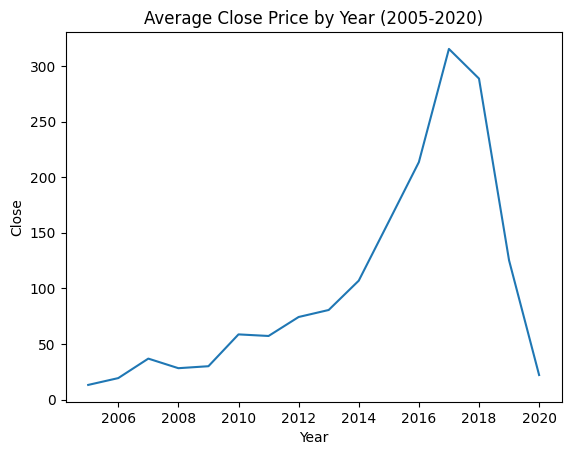

In [20]:
# Chart - 1 visualization code
# extract year from `Date` column and create a new column `year`
dataset['year'] = dataset['Date'].dt.year

# group by `year` and calculate mean `close` for each year
dataset_yearly = dataset.groupby('year')['Close'].mean().reset_index()

# create the line plot using Matplotlib
plt.plot(dataset_yearly['year'], dataset_yearly['Close'])

# set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('Average Close Price by Year (2005-2020)')

# display the plot
plt.show()


##### 1. Why did you pick the specific chart?


This chart gives us a clear understanding and visualization of closing price from July 2005 till November 2020.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that there was a good price rise from July 2005 till 2018 and it was a good time to invest as there was a up trend. The price between 5 Rs - 10 Rs in around July 2005 and reached a peak price of above 350 Rs in the year 2018.

After Rana Kapoor fraud which was done in 2018 the stock price started to fall and there was a severe down trend, in around 2020 the price reached its July 2005 rate of around 5 Rs - 10 Rs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the insights can help in creating a positive business impact, as we can see the up trend in the stock price from July 2005 to 2018 which was a beneficial time for the investor and after Rana Kapoor fraud there was downtrend in the stock price.

#### Chart - 2

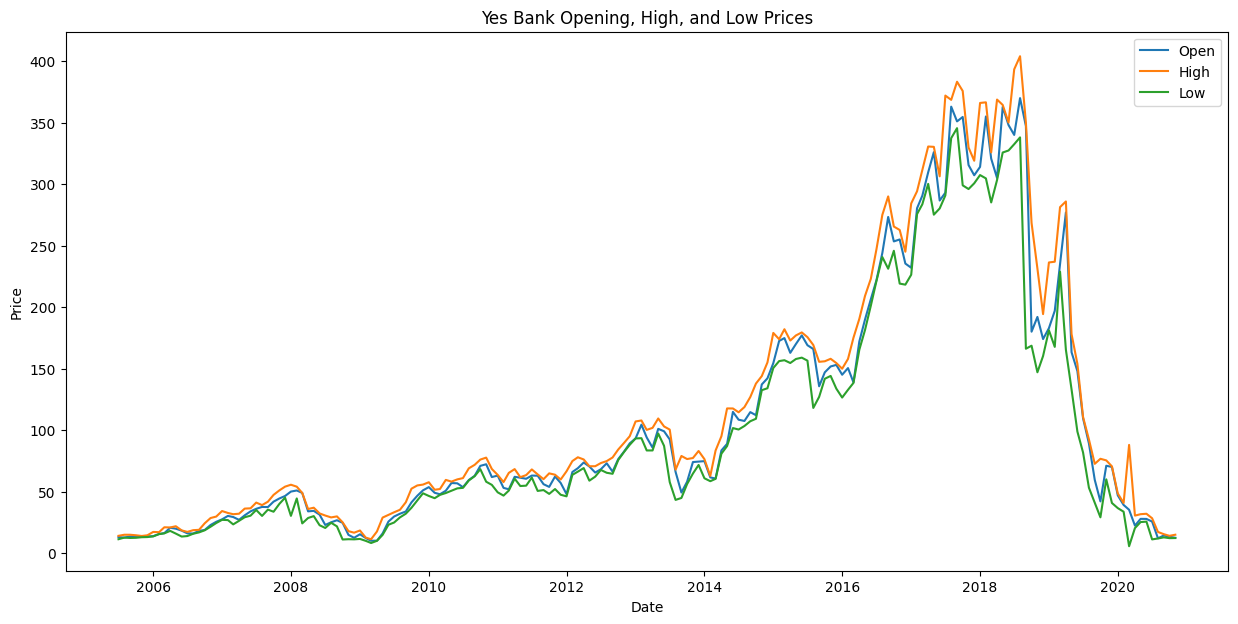

In [21]:
# Plot the opening, high, and low prices on the same graph
plt.figure(figsize=(15,7))
plt.plot(dataset['Date'], dataset['Open'])
plt.plot(dataset['Date'], dataset['High'])
plt.plot(dataset['Date'], dataset['Low'])
plt.legend(['Open', 'High', 'Low'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Yes Bank Opening, High, and Low Prices')
plt.show()


##### 1. Why did you pick the specific chart?

This chart gives us a clear uderstanding and visualization of our independent variables open,high and low price from July 2005 till November 2020.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that there was a good price rise from July 2005 till 2018 and it was a good time to invest as there was a up trend. The price between 5 Rs - 10 Rs in around July 2005 and reached a peak price of above 350 Rs in the year 2018.

After Rana Kapoor fraud which was done in 2018 the stock price started to fall and there wa a severe down trend, in around 2020 the price reached its July 2005 rate of around 5 Rs - 10 Rs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the insights can help in creating a positive business impact, as we can see the up trend in the stock price from July 2005 to 2018 which was a beneficial time for the investor and after Rana Kapoor fraud there was downtrend in the stock price.

#### Chart - 3

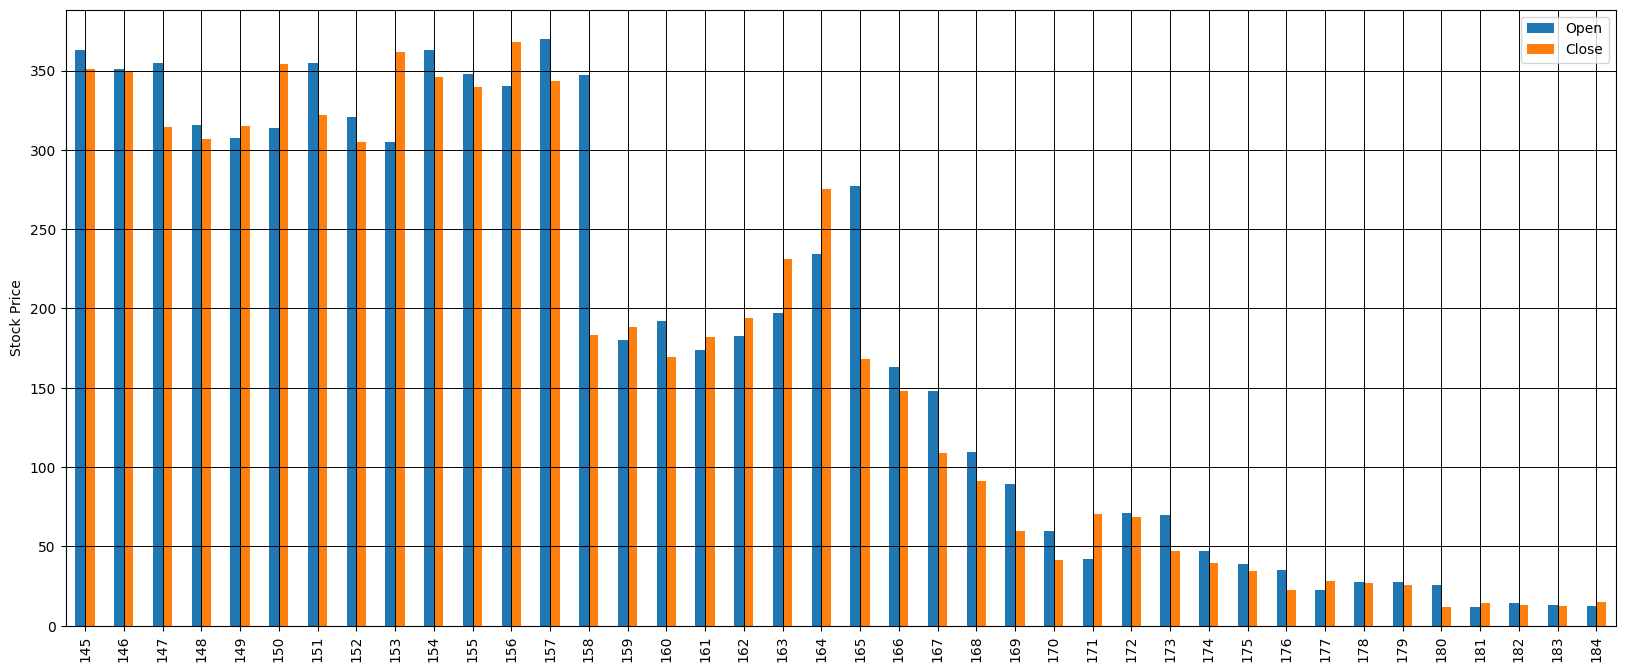

In [22]:
# Chart - 3 visualization code
dataset[['Open','Close']].tail(40).plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.7', color='black')
plt.ylabel("Stock Price")
plt.show()

##### 1. Why did you pick the specific chart?

The above chart shows a clear relation between the opening price and closing price.

Blue bar indicates opening price of that month, orange bar indicates closing price of that month.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in creating a positive business impact, by studying the chart we can understand that continuous 4 months in a row the price were at lowest i.e. from August 2020 to November 2020, this period can be avoided for investing.

#### Chart - 4

Text(0.5, 1.0, '')

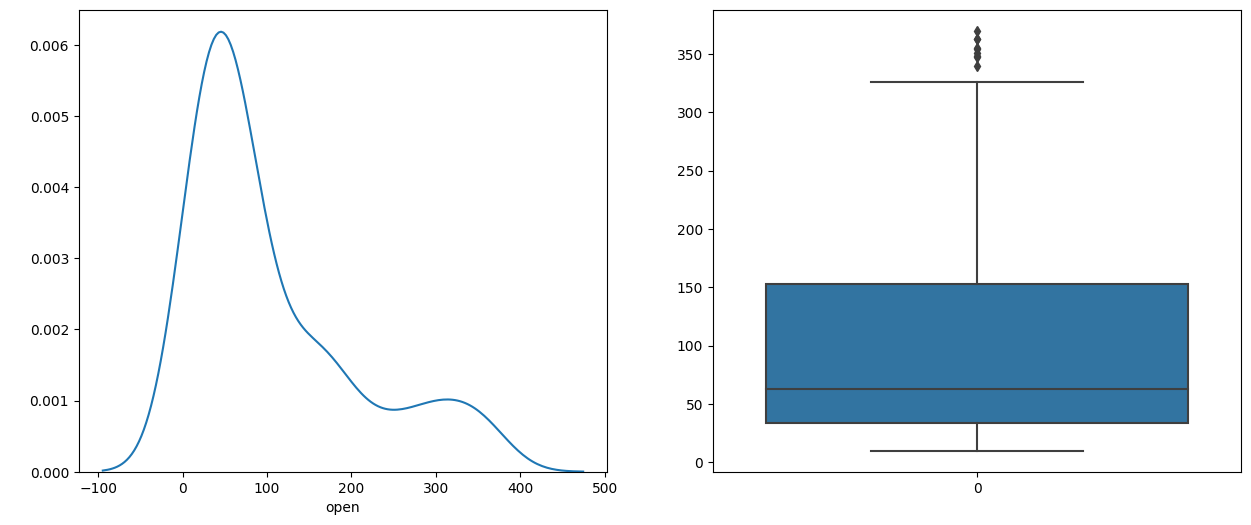

In [23]:
# Chart - 4 visualization code
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.kdeplot(dataset['Open'])
fig.set_ylabel(' ')
fig.set_xlabel('open')

plt.subplot(1, 2, 2)
fig = sns.boxplot(dataset['Open'])
fig.set_title('')

##### 1. Why did you pick the specific chart?

Above chart was picked for density visualisation of the opening price and Visulazing outliers

##### 2. What is/are the insight(s) found from the chart?

By understanding the density chart we can say that opening price was mostly in the range of 40Rs to 150Rs wit the peak at around 60Rs The outliers are around 350Rs price range

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the density chart can help in creating a positive business impact, we can say that the stock in was around 40Rs to 150Rs most of the time and this could have been a good time to invest and was in 350Rs just a few times, so selling the stock at 350Rs range can be a good idea

#### Chart - 5

<ipython-input-24-83c14d8b465a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(dataset['Low'])


Text(0.5, 1.0, '')

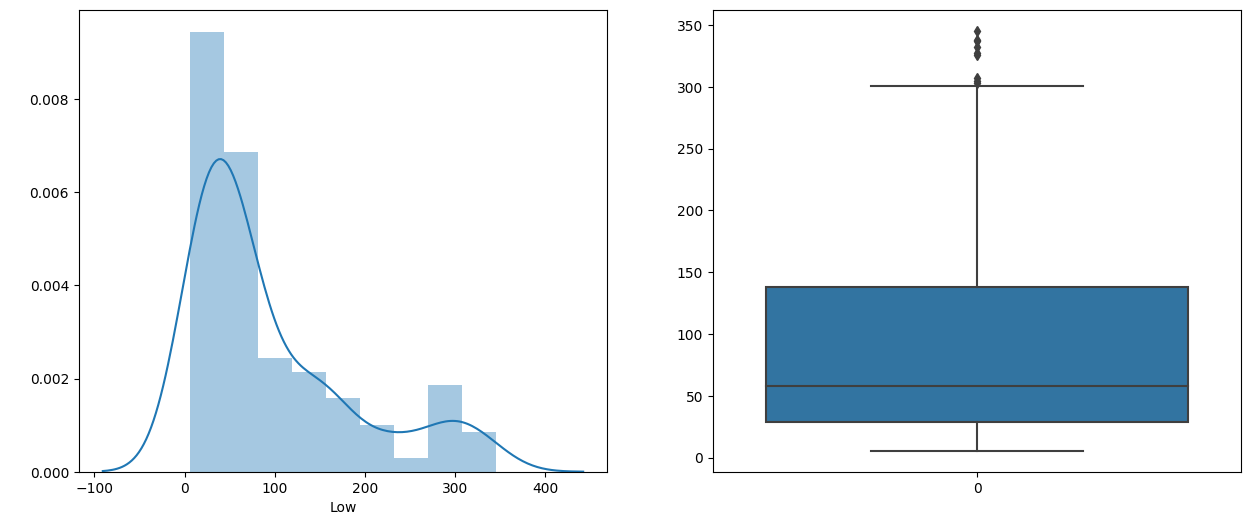

In [24]:
# Chart - 5 visualization code
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(dataset['Low'])
fig.set_ylabel(' ')
fig.set_xlabel('Low')

plt.subplot(1, 2, 2)
fig = sns.boxplot(dataset['Low'])
fig.set_title('')

##### 1. Why did you pick the specific chart?

Above chart was picked for better understanding of the density distribution visualisation of the lowest price of the month and Visulazing outliers.

##### 2. What is/are the insight(s) found from the chart?

By understanding the above chart we can say that density of YES BANK stock low price is at highest between 5Rs to 60Rs price range and the density keeps reducing after 100Rs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by understanding the density of low price of YES BANK stock price we can say that the chances of stock price closing between 5Rs to 60Rs is high and the chances of stock price closing higher than 100Rs is less

#### Chart - 6

<ipython-input-25-0340598f41d2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(dataset['High'])


Text(0.5, 1.0, '')

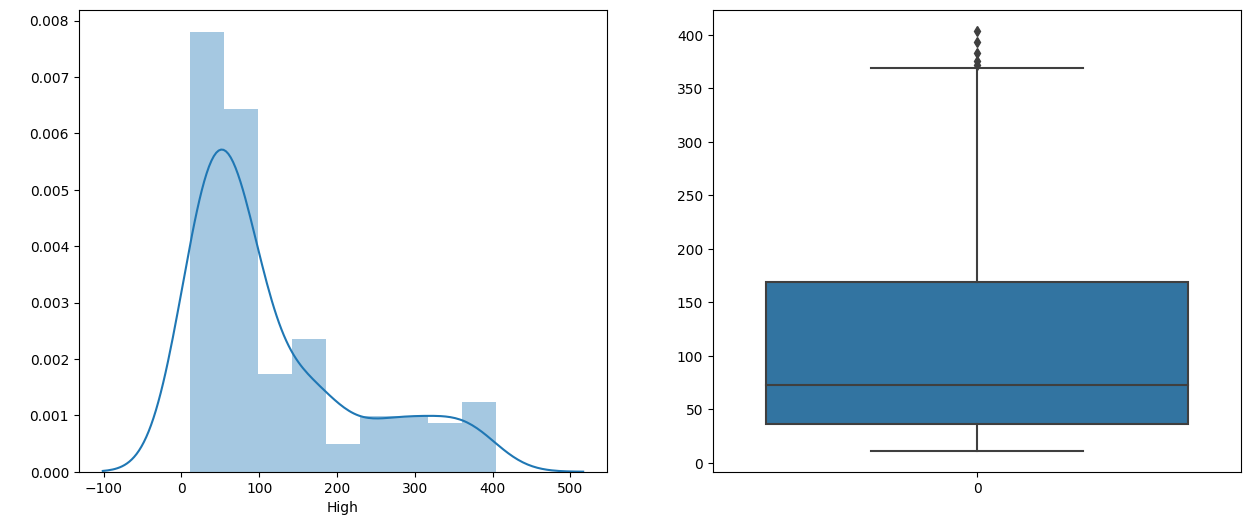

In [25]:
# Chart - 6 visualization code
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(dataset['High'])
fig.set_ylabel(' ')
fig.set_xlabel('High')

plt.subplot(1, 2, 2)
fig = sns.boxplot(dataset['High'])
fig.set_title('')

##### 1. Why did you pick the specific chart?

Above chart was picked for better understanding of the density distribution visualisation of the highest price of the month and Visulazing outliers.

##### 2. What is/are the insight(s) found from the chart?

By understanding the above chart we can say that density of YES BANK stock high price is at highest between 5Rs to 60Rs price range and the density keeps reducing after 80Rs

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by understanding the density of high price of YES BANK stock price we can say that the chances of stock price reaching high between 5Rs to 60Rs is high and the chances of stock price closing higher than 100Rs is less

#### Chart - 7

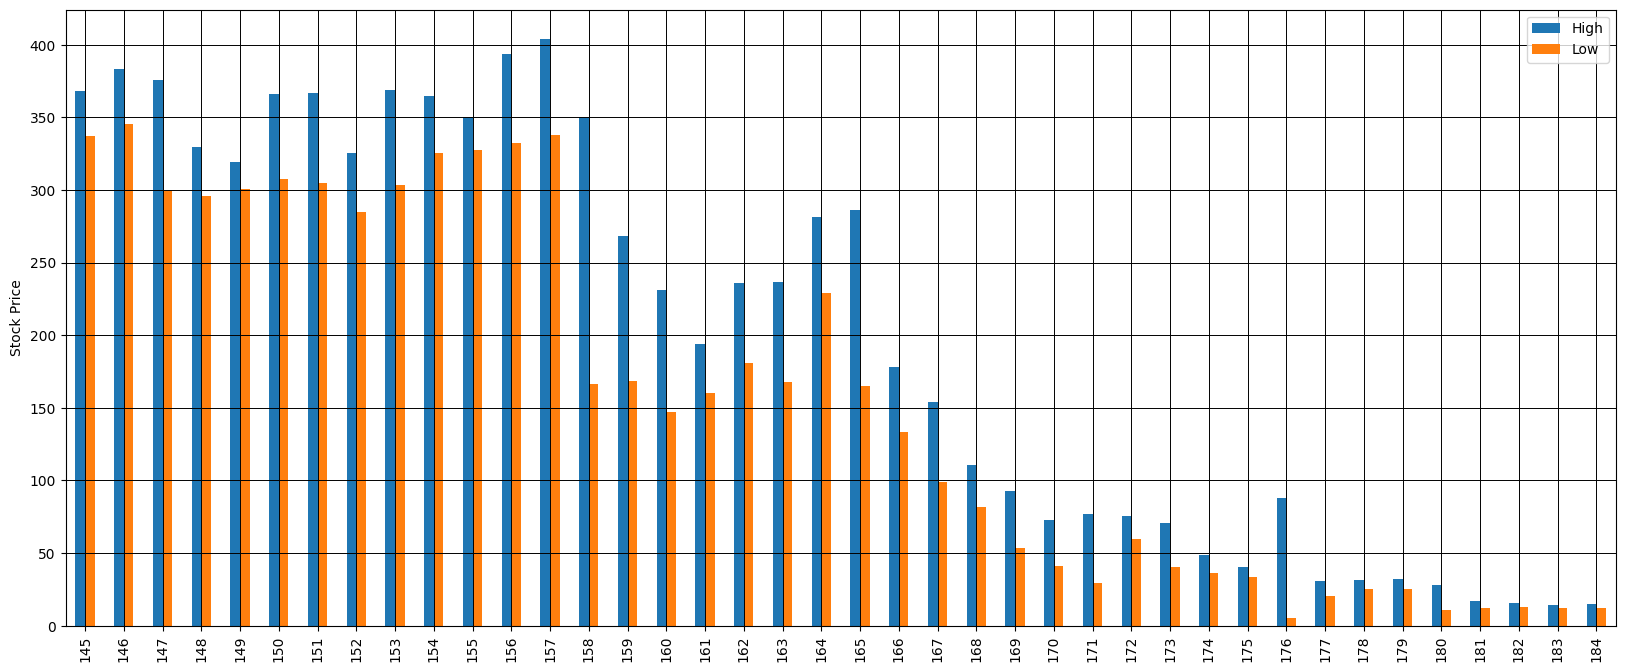

In [26]:
# Chart - 7 visualization code
dataset[['High','Low']].tail(40).plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.7', color='black')
plt.ylabel("Stock Price")
plt.show()

##### 1. Why did you pick the specific chart?

From the above chart we get the insights of the high and low prices of each month from 2017-2020

##### 2. What is/are the insight(s) found from the chart?

The chart shows that for some data points, the difference between the 'High' and 'Low' prices is quite significant, while for others it is relatively small.
                                                                                  The chart also shows that for some data points, the 'Low' price is very close to or even equal to the 'High' price, while for others there is a larger gap between the two

#### Chart - 8

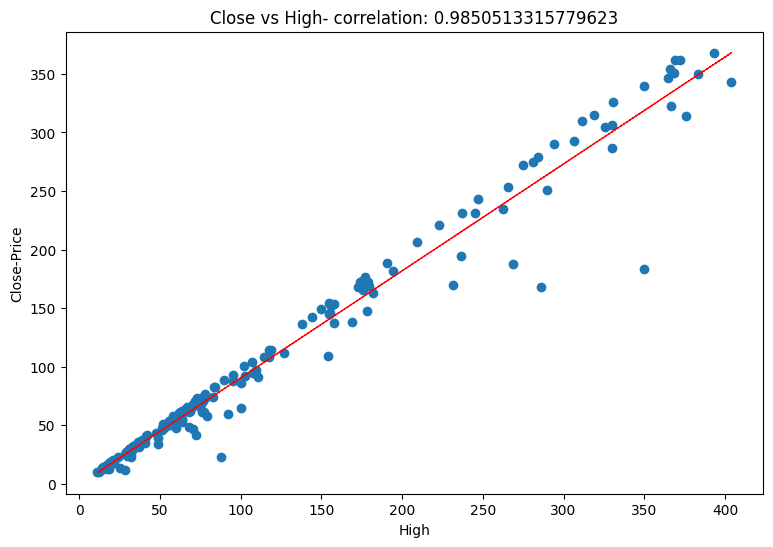

In [27]:
# Chart - 8 visualization code
#scatter plot between dependent variable with all independent variables.
for col in independent_var[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close-Price')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Close'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

Here we selected 3 charts to understand the correlation between Close price and Open price, Close price and High price, Close price and Low price

##### 2. What is/are the insight(s) found from the chart?

All three charts show a positive correlation. Close-Open chart has a correlation of 0.9779 Close-High chart has a correlation of 0.9850 Close-Low chart has a correlation of 0.9953 The chances of stock price closing at low are higher than compared to opening price

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can say that Close-Low chart has the highest correlation of 0.9953, followed by Close-High chart has a correlation of 0.9850 and least is Close-Open chart has a correlation of 0.9779, if we would like to determine the closing price we can go by selecting the low price correlation as chances of stock price closing at low price is highest.

#### Chart - 9

In [28]:
# Identify Numerical Columns
numerical_col = dataset.describe().columns
numerical_col

Index(['Open', 'High', 'Low', 'Close', 'year'], dtype='object')

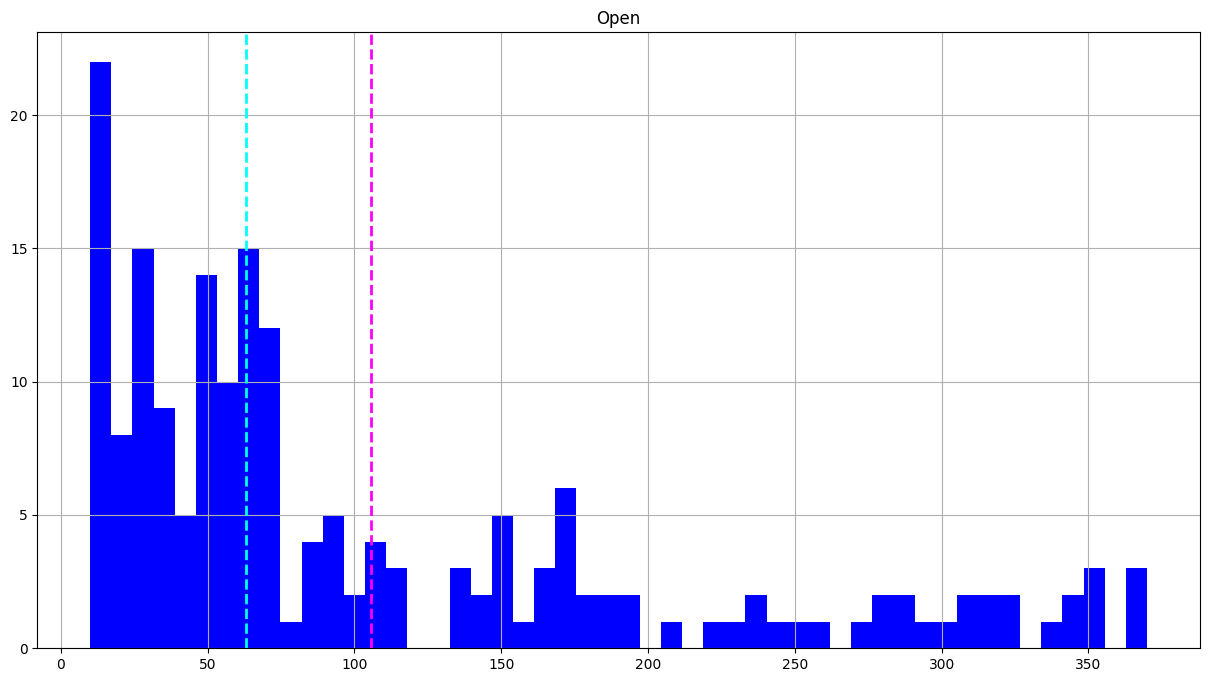

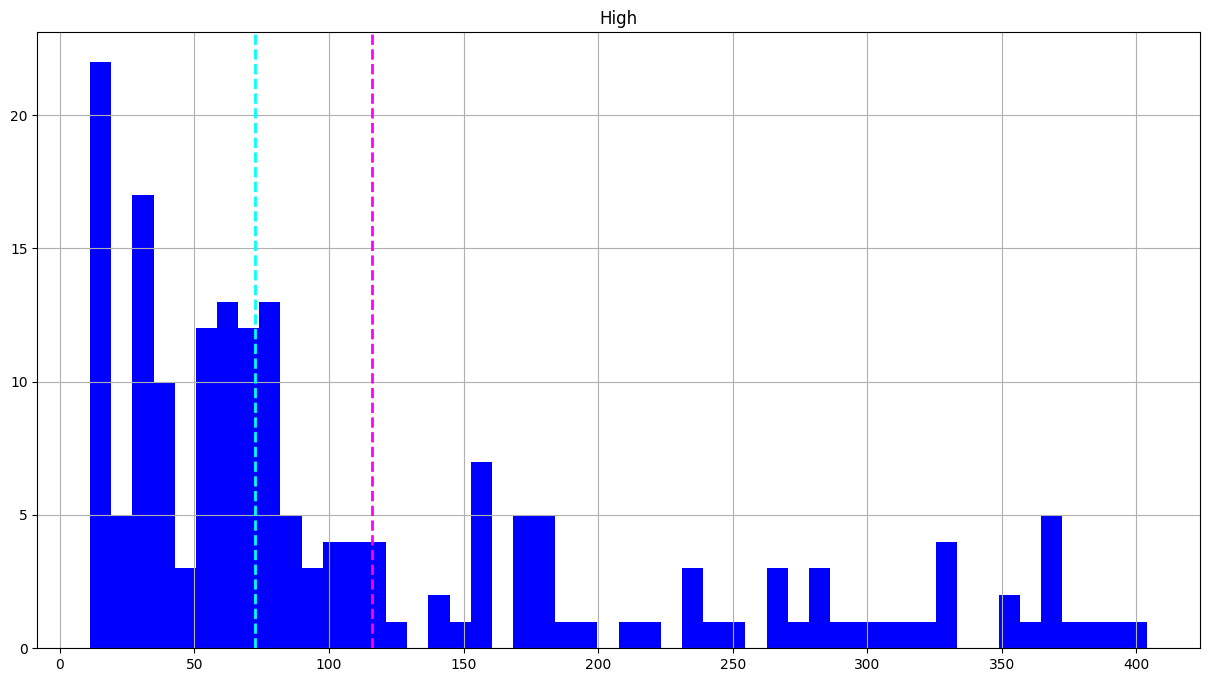

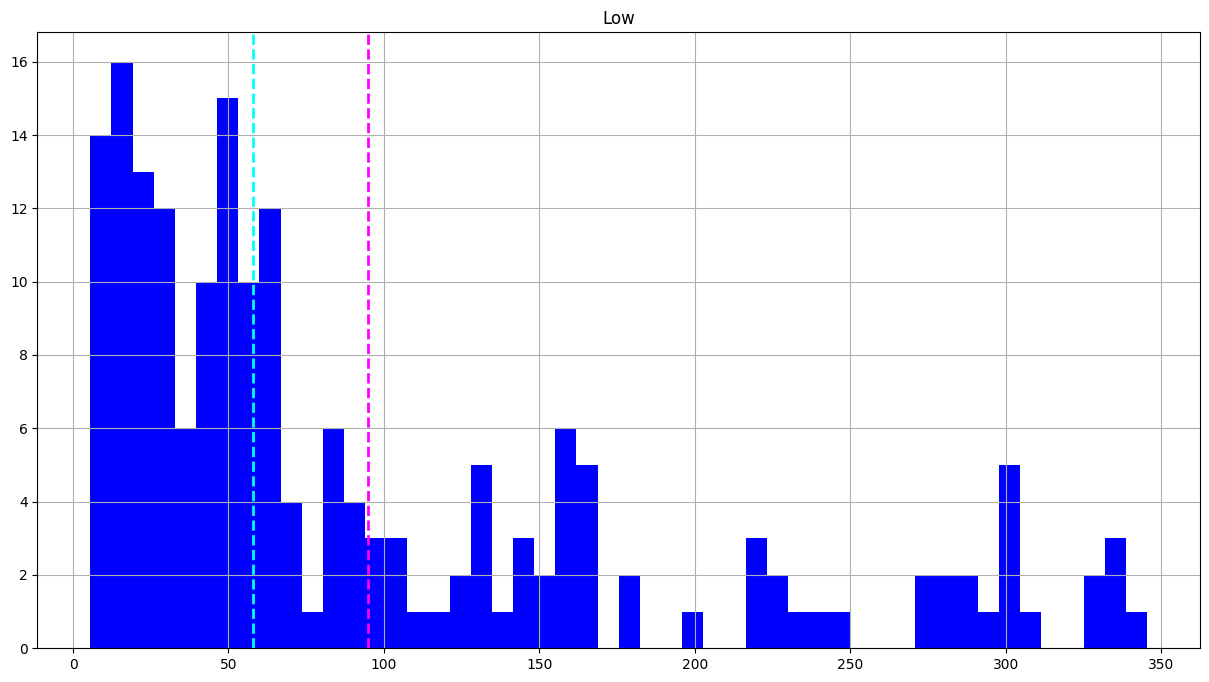

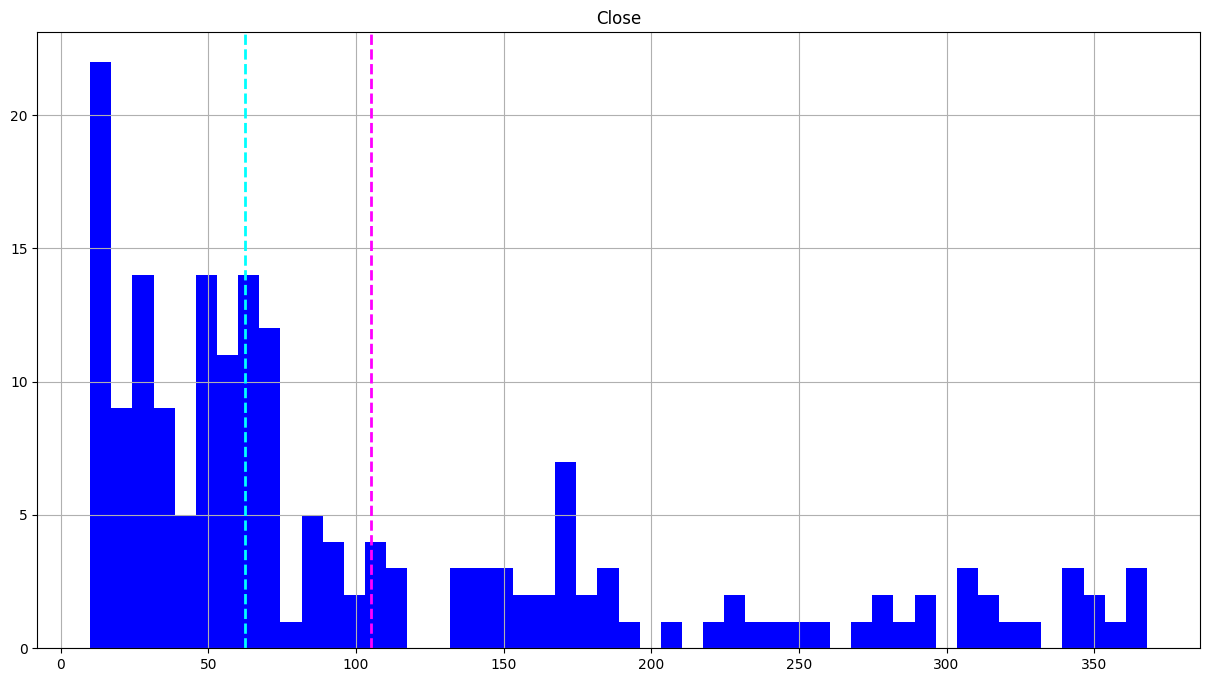

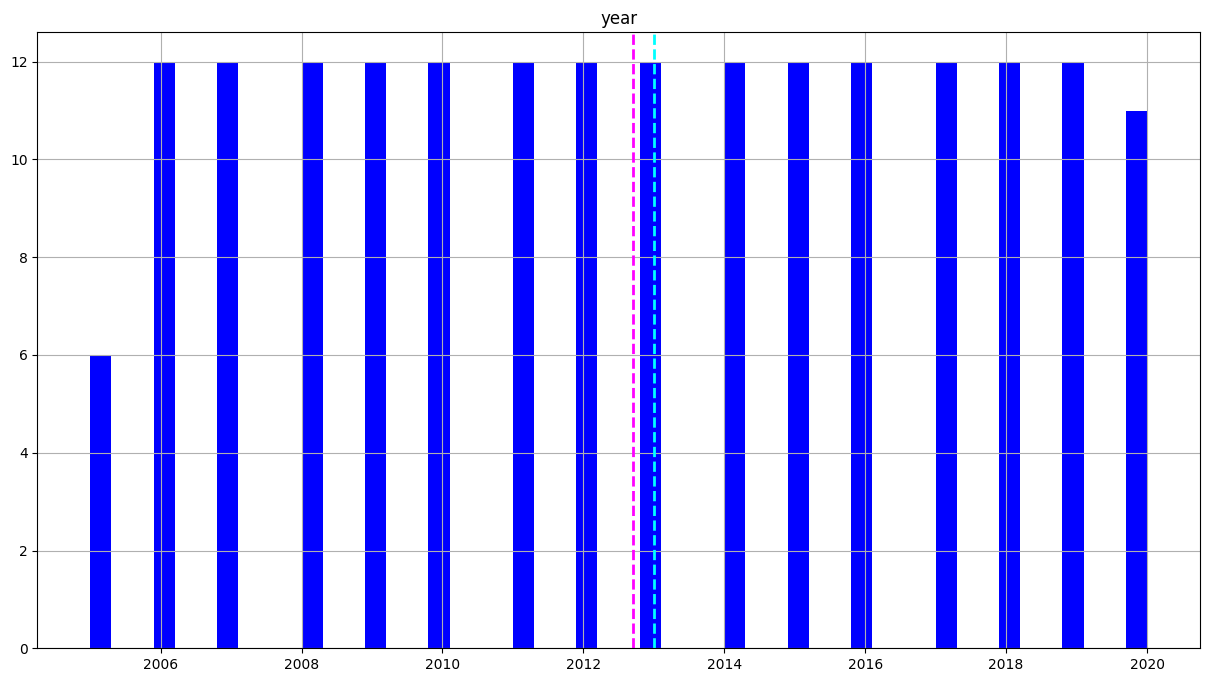

In [29]:
for i in numerical_col[:]:
  fig = plt.figure(figsize=(15,8))
  ax = fig.gca()
  features = dataset[i]
  label = dataset['Close']
  features.hist(bins = 50,ax = ax,color = 'blue')
  ax.axvline(features.mean(),color = 'magenta',linestyle = 'dashed',linewidth = 2)
  ax.axvline(features.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)
  ax.set_title(i)

##### 1. Why did you pick the specific chart?

By creating a histogram for each feature in the dataset and displaying the mean and median values, we can quickly assess the distribution and center of each variable and identify any potential outliers or anomalies that may require further investigation.

##### 2. What is/are the insight(s) found from the chart?

By understanding the chart we can say that the relation between low and close is the highest, followed by high and close, and least is open and close.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

it is important to carefully analyze the insights gained from a histogram  and consider the potential implications and trade-offs before making decisions that could impact the business.So there is no negative growth.

#### Chart - 10

<ipython-input-30-7ad86768eadd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Close'],color='blue')


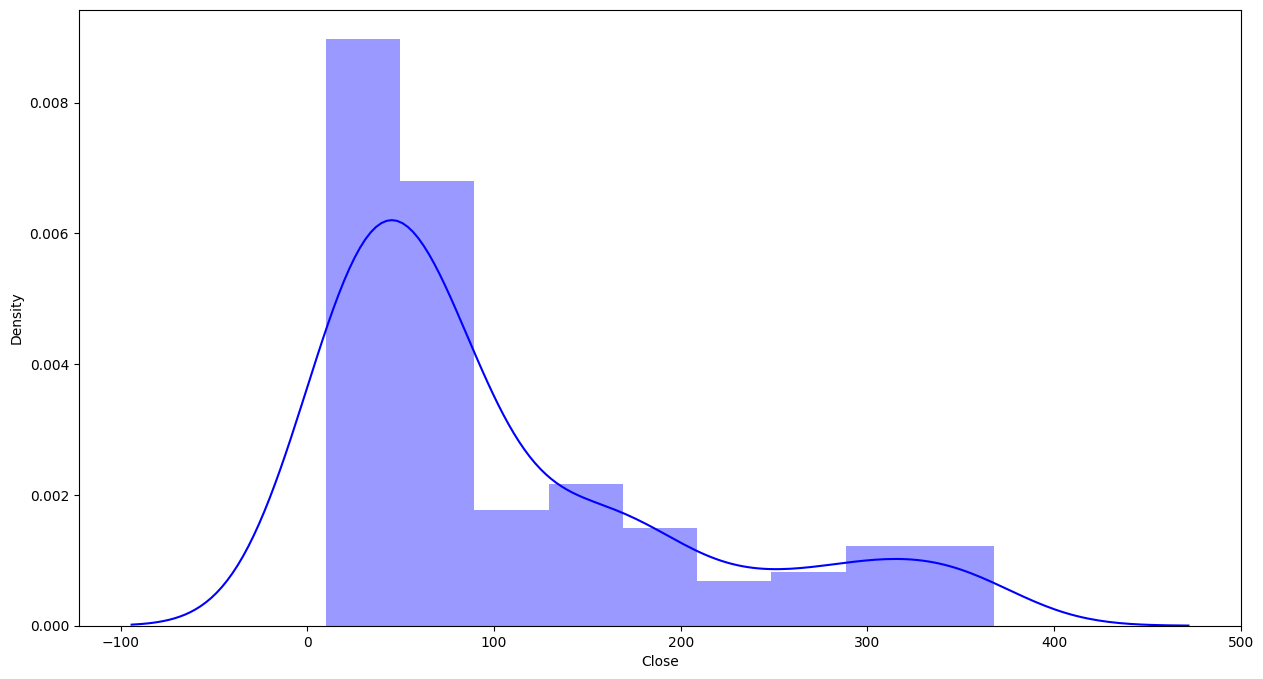

In [30]:
# Chart - 10 visualization code
# Dependent variables
plt.figure(figsize=(15,8))
sns.distplot(dataset['Close'],color='blue')
plt.show()


##### 1. Why did you pick the specific chart?

This code will create a histogram and a kernel density estimate plot for the 'Close' column of a dataset using the seaborn library.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the distribution of the closing prices of the given dataset. From the chart, we can see that the distribution of the closing prices is roughly normal or bell-shaped, with a slight right skewness. This means that most of the closing prices are concentrated around the mean value, and the prices gradually decrease as we move towards the higher values.

#### Chart - 11

<ipython-input-31-6b3d59554668>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Open'], color='blue')
<ipython-input-31-6b3d59554668>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['High'], color='blue')
<ipython-input-31-6b3d59554668>:10: UserWarning: 

`distplot` is a depre

<Axes: xlabel='Low', ylabel='Density'>

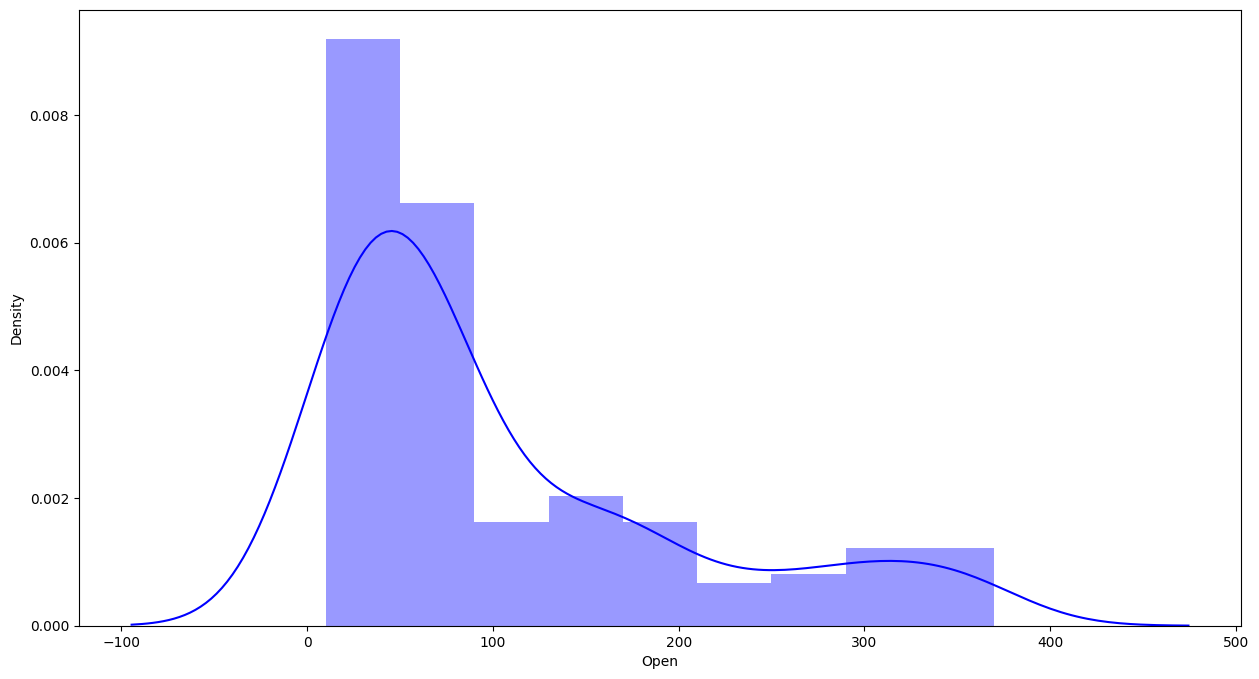

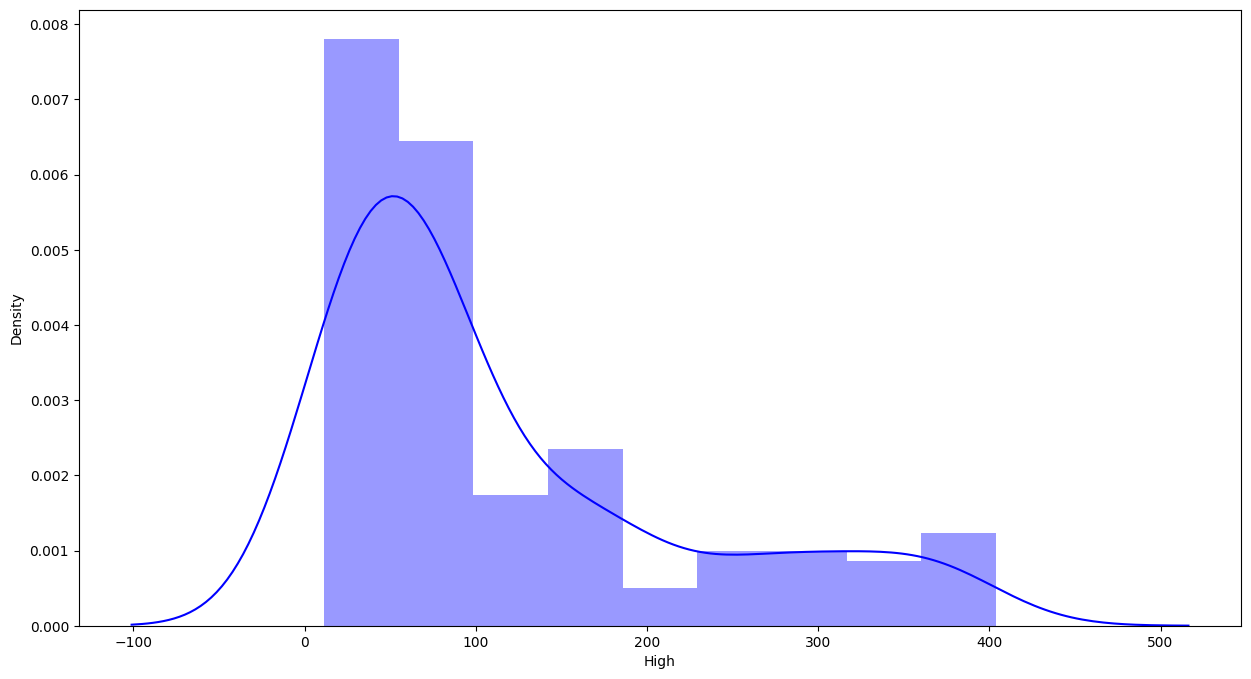

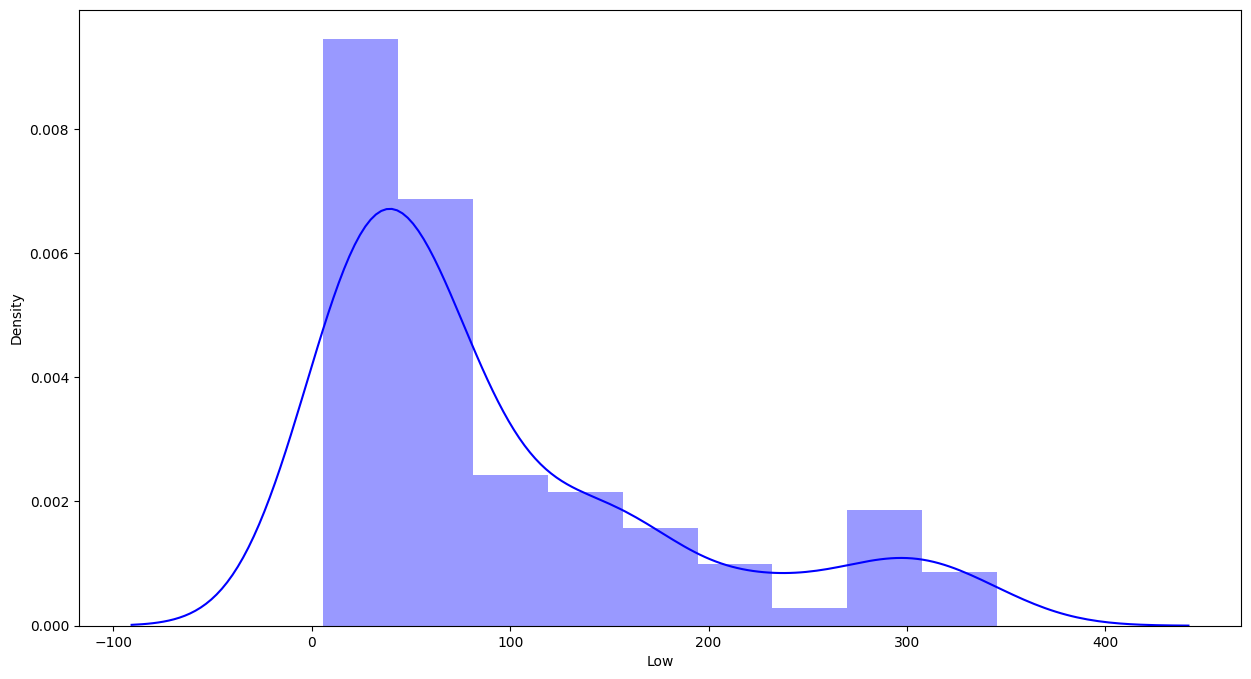

In [31]:
# Chart - 11 visualization code
# Independent variables
plt.figure(figsize=(15,8))
sns.distplot(dataset['Open'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(dataset['High'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(dataset['Low'], color='blue')

##### 1. Why did you pick the specific chart?

The three charts provided are density plots of the distribution of the stock prices' opening, high, and low values respectively. These plots are useful in visualizing the spread of the data and identifying any skewness or patterns in the distribution. They are also helpful in identifying any outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

The charts show the distribution of the opening, high, and low prices of the stock over the given time period. From the charts, we can see that the distribution of each variable is approximately normal, with some outliers in the higher values. The insights gained from these charts are similar to that of the previous chart (Chart-10) which shows the distribution of the closing price. The opening, high, and low prices seem to have similar distributions as the closing price, with most of the data points falling in the middle range of prices.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the three distributions can help create a positive impact on the business. By analyzing the distribution of the opening, high, and low prices, the business can identify potential patterns or trends in stock prices that can be used to make informed investment decisions. For example, if the distributions indicate that the stock prices tend to be higher during certain times of the year or month, the business can plan their investment strategy accordingly. Similarly, if the distributions indicate that there is a significant amount of volatility in the stock prices, the business can plan their investments to account for this volatility.

chart 12

In [32]:

# Chart - 12 visualization code

def plot_histograms(df):
    """
    Plots a histogram for each numeric column in a DataFrame.

    Parameters:
    -----------
    df : pandas DataFrame
        The DataFrame containing the columns to plot.

    Returns:
    --------
    None
    """
    cols_list = [col for col in df.columns if df[col].dtype != 'object'] # get list of numeric columns
    num_plots = len(cols_list)
    num_rows = math.ceil(num_plots / 3)
    num_cols = min(num_plots, 3)
    #feat = list(df.columns)
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows*3)) # create subplots
    for i,col in enumerate(cols_list):
        ax = axes[i//num_cols,i%num_cols]
        sns.histplot(data=df, x=col, kde=True, ax=ax,color='g') # create histogram using Seaborn
        ax.set_title(f'Histogram of {col}') # set title of plot to column name
    plt.tight_layout() # adjust layout of subplots
    plt.show() # display the plot


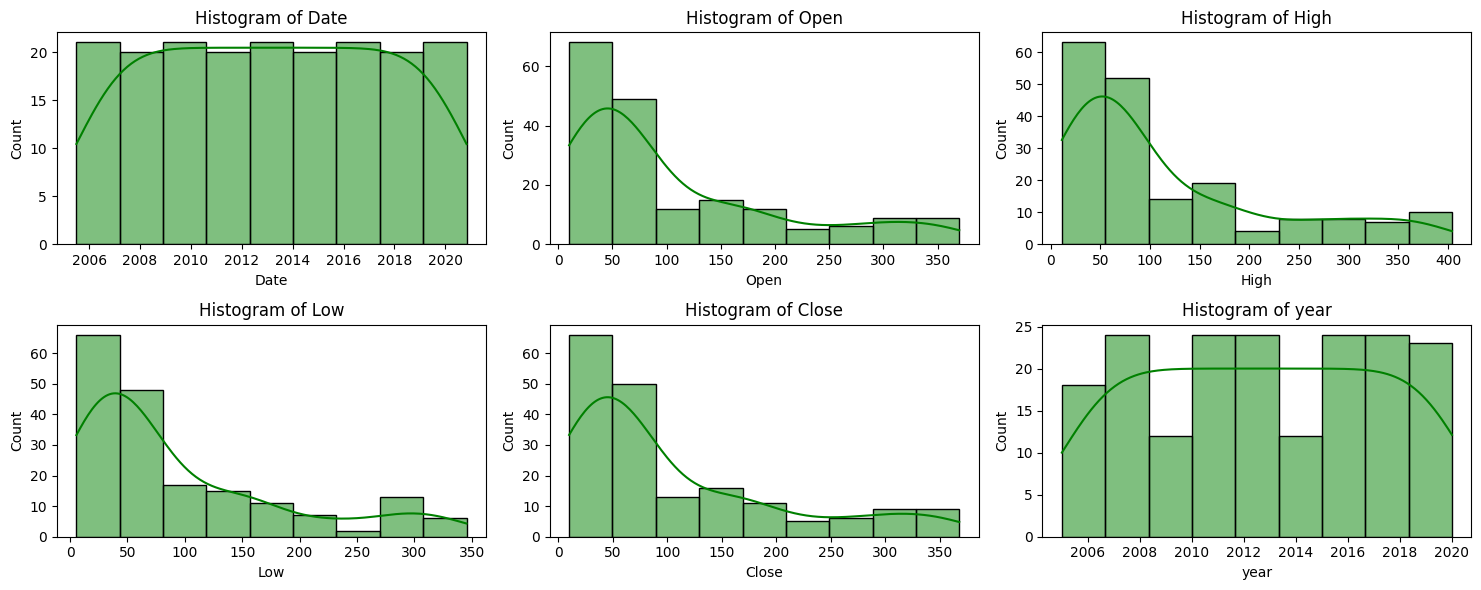

In [33]:
plot_histograms(dataset)

#### Chart - 14 - Correlation Heatmap

<ipython-input-34-23a53ae2df39>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr()


<Axes: >

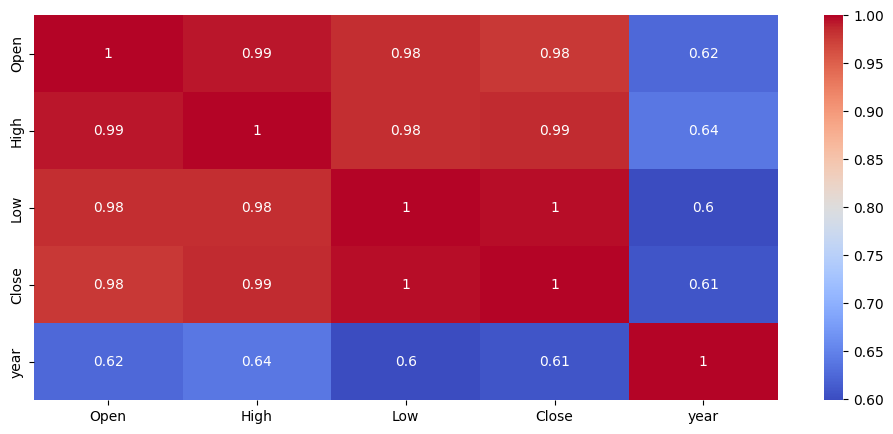

In [34]:
# Correlation Heatmap visualization code
corr=dataset.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr, annot = True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?


This chart was chosen to visualise the heat map between Close, Open, High, Low prices.

##### 2. What is/are the insight(s) found from the chart?

By understanding the chart we can say that the relation between low and close is the highest, followed by high and close, and least is open and close.

#### Chart - 15 - Pair Plot 

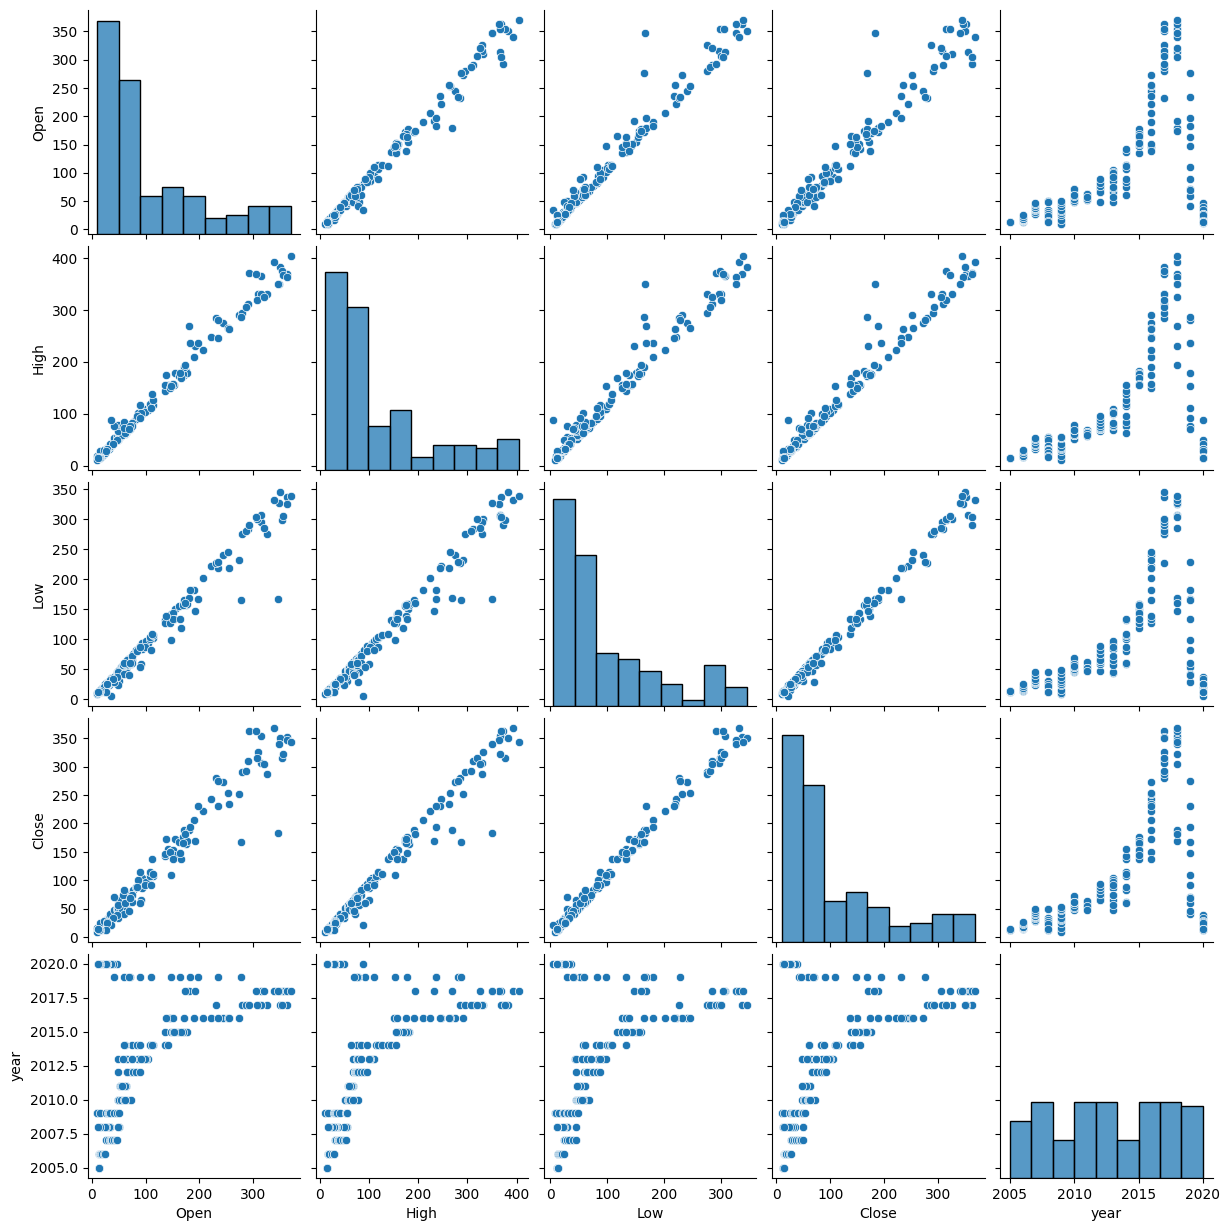

In [35]:
# Pair Plot visualization code
sns.pairplot(dataset)

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

##### 2. What is/are the insight(s) found from the chart?

By this Seaborn Pairplot all the data are linear.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

To perform hypothesis testing for these statements, we need to set up null and alternative hypotheses, determine the appropriate statistical test, and calculate the p-value to determine if we reject or fail to reject the null hypothesis.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Hypothetical Statement 1: The closing price of Yes Bank's stock has significantly decreased after the fraud case in 2018.

Null hypothesis (H0): The closing price of Yes Bank's stock has not significantly decreased after the fraud case in 2018.

Alternate hypothesis (Ha): The closing price of Yes Bank's stock has significantly decreased after the fraud case in 2018.

#### 2. Perform an appropriate statistical test.

In [36]:
print(dataset['Date'])

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]


In [37]:
from scipy import stats

# Subset the dataset to include only the closing price and date after the fraud case
closing_prices = dataset.loc[dataset['Date'] >= '2018-03-01', 'Close']

# Calculate the mean closing price after the fraud case
mean_after_fraud = np.mean(closing_prices)

# Calculate the mean closing price before the fraud case
mean_before_fraud = np.mean(dataset.loc[dataset['Date'] < '2018-03-01', 'Close'])

# Calculate the t-statistic and p-value
t_stat, p_value = stats.ttest_ind(closing_prices, dataset.loc[dataset['Date'] < '2018-03-01', 'Close'], equal_var=False)

# Set the significance level
alpha = 0.05

# Print the results
print(f"Mean closing price after the fraud case: {mean_after_fraud:.2f}")
print(f"Mean closing price before the fraud case: {mean_before_fraud:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("Reject null hypothesis - The closing price of Yes Bank's stock has significantly decreased after the fraud case in 2018.")
else:
    print("Fail to reject null hypothesis - There is no significant difference in the closing price of Yes Bank's stock before and after the fraud case in 2018.")


Mean closing price after the fraud case: 137.37
Mean closing price before the fraud case: 98.22
T-statistic: 1.73
P-value: 0.091
Fail to reject null hypothesis - There is no significant difference in the closing price of Yes Bank's stock before and after the fraud case in 2018.


##### Which statistical test have you done to obtain P-Value?

In hypothesis 1, we have performed a two-sample t-test to compare the means of two groups (closing price before and after the fraud case). The t-test returns a p-value that tells us the probability of observing such a difference in means by chance, assuming that there is no real difference between the two groups.

##### Why did you choose the specific statistical test?

For Hypothesis 1, we used the two-sample t-test with unequal variances. This test was selected because we needed to compare the mean closing prices of Yes Bank's stock before and after the fraud case, and the sample sizes for both groups were different. As the population standard deviation was unknown, unequal variances were assumed. The two-sample t-test is appropriate in this situation since it is used to compare the means of two independent groups and can accommodate unequal variances.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null hypothesis (H0): There is no significant difference in the mean closing prices of Yes Bank's stock between weekdays and weekends.

Alternative hypothesis (Ha): There is a significant difference in the mean closing prices of Yes Bank's stock between weekdays and weekends.


#### 2. Perform an appropriate statistical test.

In [38]:
# Convert the 'Date' column to a datetime object
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d-%m-%Y')

# Create a new column called 'Weekday' with the weekday for each date in the dataset
dataset['Weekday'] = dataset['Date'].dt.weekday

# Display the first few rows of the updated dataset
print(dataset.head())


        Date   Open   High    Low  Close  year  Weekday
0 2005-07-01  13.00  14.00  11.25  12.46  2005        4
1 2005-08-01  12.58  14.88  12.55  13.42  2005        0
2 2005-09-01  13.48  14.87  12.27  13.30  2005        3
3 2005-10-01  13.20  14.47  12.40  12.99  2005        5
4 2005-11-01  13.35  13.88  12.88  13.41  2005        1


In [39]:
import scipy.stats as stats

# Convert the 'Date' column to a datetime object
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d-%m-%Y')

# Define the null and alternative hypotheses
null_hypothesis = "There is no significant difference in the closing price of Yes Bank's stock between weekdays and weekends."
alternative_hypothesis = "There is a significant difference in the closing price of Yes Bank's stock between weekdays and weekends."

# Perform a two-sample t-test assuming unequal variances
weekdays = dataset[dataset['Weekday'] < 5]['Close']
weekends = dataset[dataset['Weekday'] >= 5]['Close']
test_result = stats.ttest_ind(weekdays, weekends, equal_var=False)

# Extract the p-value from the test result
p_value = test_result.pvalue
print(p_value)

# Determine whether to reject or fail to reject the null hypothesis based on the significance level
significance_level = 0.05
if p_value < significance_level:
    print(alternative_hypothesis)
else:
    print(null_hypothesis)


0.7185685198247045
There is no significant difference in the closing price of Yes Bank's stock between weekdays and weekends.


##### Which statistical test have you done to obtain P-Value?

In the above code, a two-sample t-test assuming unequal variances has been performed to obtain the P-value.

##### Why did you choose the specific statistical test?

The two-sample t-test assuming unequal variances was chosen to obtain the p-value for Hypothesis 2 because we are comparing the means of two independent groups (weekday and weekend) and the sample sizes for both groups are not equal. Additionally, the population standard deviation is unknown, so we assume unequal variances. The two-sample t-test is an appropriate test for this scenario because it is used to compare the means of two independent groups and can handle unequal variances.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): There is no correlation between the opening price and the closing price of Yes Bank's stock. Alternative hypothesis (Ha): There is a positive correlation between the opening price and the closing price of Yes Bank's stock.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(dataset['Open'], dataset['Close'])

# Print the results
print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant positive correlation between the opening price and the closing price of Yes Bank's stock.")
else:
    print("There is no significant correlation between the opening price and the closing price of Yes Bank's stock.")


Pearson correlation coefficient: 0.9779710062230934
p-value: 1.852774505867169e-126
There is a significant positive correlation between the opening price and the closing price of Yes Bank's stock.


##### Which statistical test have you done to obtain P-Value?

In this scenario, we can use Pearson's correlation coefficient to test the correlation between the opening price and the closing price of Yes Bank's stock. The p-value obtained from this test can help us determine whether to reject or fail to reject the null hypothesis.

##### Why did you choose the specific statistical test?

We used the Pearson correlation coefficient to test for a correlation between the opening and closing prices of Yes Bank's stock because both variables are continuous and there is a hypothesis that there is a positive correlation between them. The Pearson correlation coefficient measures the strength and direction of a linear relationship between two variables, and it ranges from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation. This test is appropriate because it can handle continuous variables and test for a linear relationship between them

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [41]:
# Handling Missing Values & Missing Value Imputation
dataset.isnull().sum().sort_values(ascending=False)[:5]

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing value present in this dataset.

### 2. Feature Manipulation & Selection

#### 2. Feature Selection

In [42]:
independent_var = ['Open','High','Low']
Target = dataset['Close']

In [43]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif


In [44]:
calc_vif(dataset[independent_var])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


##### What all feature selection methods have you used  and why?

Variance Inflation Factor method.Variance Inflation Factor (VIF) is a popular feature selection method that helps to identify the multicollinearity among the independent variables in a linear regression model. VIF is a measure of how much the variance of the estimated regression coefficient is increased due to the collinearity among the independent variables.

##### Which all features you found important and why?

When the VIF value of an independent variable is greater than 1, it indicates that the variance of the estimated regression coefficient is being inflated by the presence of the other independent variables, which means that there is multicollinearity among the independent variables. High VIF values can lead to unreliable and unstable regression coefficient estimates and inflated standard errors, which can affect the interpretation and prediction performance of the model.

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?


Because of the data being moderately right skewed we will be using log transformation for normal distribution.


In [45]:
#from scipy.stats import zscore
#Using Log transformation
independent_var = ['Open','High','Low']
x = np.log10(dataset[independent_var])

In [46]:
y = np.log10(dataset['Close'])

<ipython-input-47-e7ebb98a8419>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(np.log10(dataset[var]))
<ipython-input-47-e7ebb98a8419>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(np.log10(dataset[var]))
<ipython-input-47-e7ebb98a8419>:5: UserWarning: 

`distplot` is a deprecat

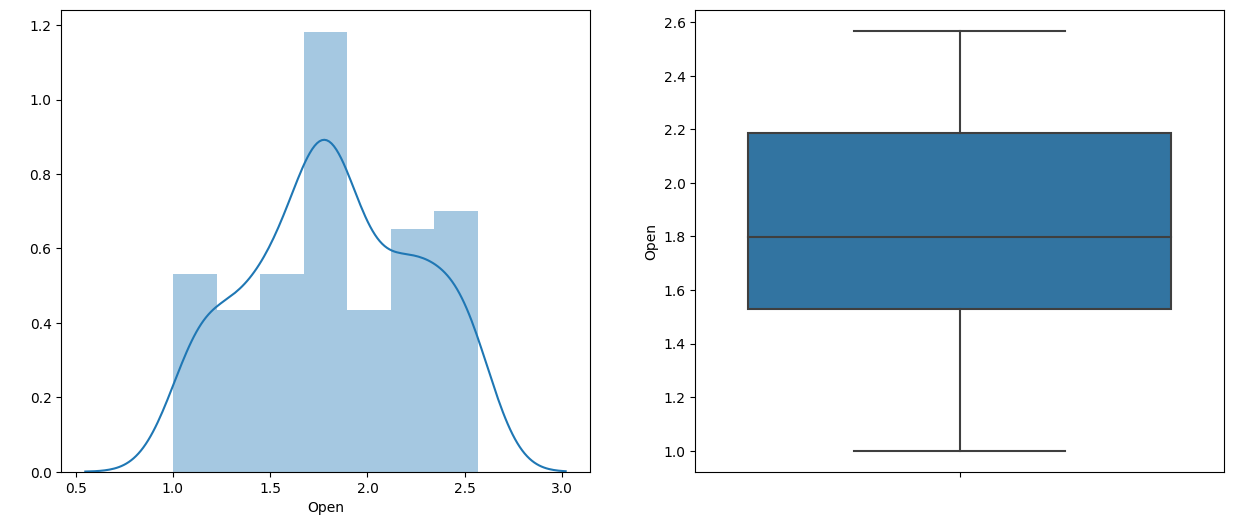

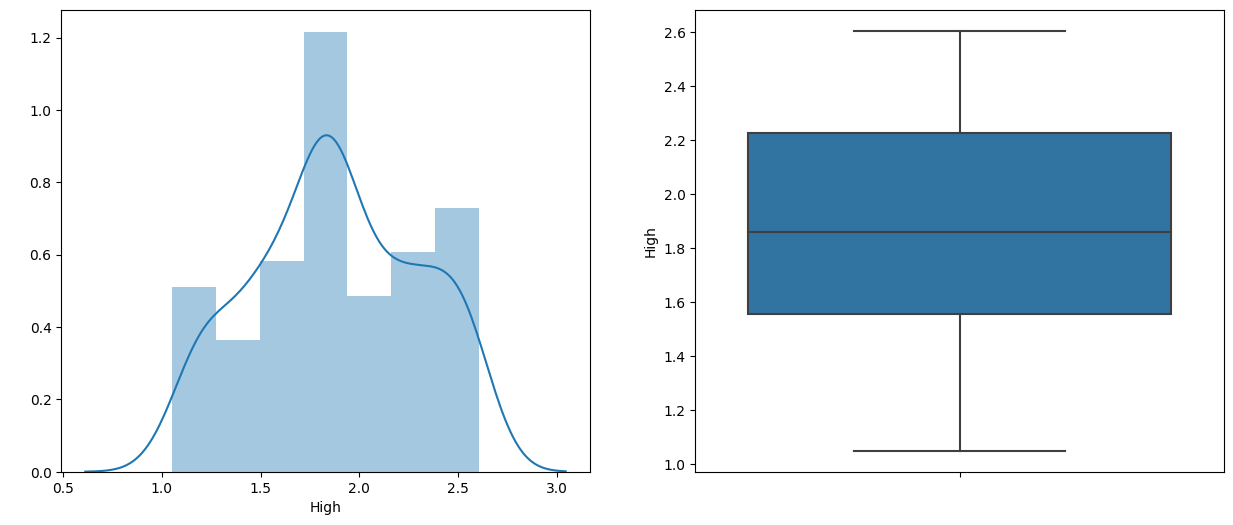

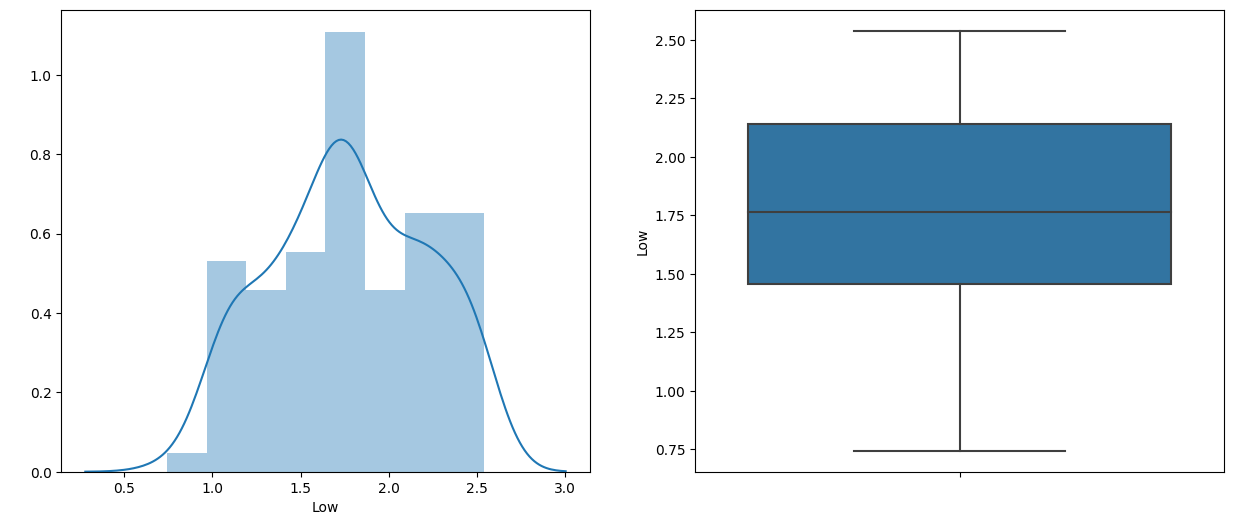

In [47]:
# Transform Your data
for var in independent_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(dataset[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(dataset[var]))
    fig.set_title('')
    fig.set_ylabel(var)

### 4. Data Splitting

In [48]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


##### What data splitting ratio have you used and why? 


We used Train test split. A split of 80-20 % is done on Trian and Test respectively, beacuse its considered to be optimum split.

## ***7. ML Model Implementation***

### ML Model - 1- Linear Regression

Here we are using Linear Regression machine learning algorithm for building our model.It is a statistical method that is used for predictive analysis.Linear regression algorithm shows a linear relationship between a dependent variable and one or more independent variables, thats why it is called as linear regression.

In [49]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
# Fit the Algorithm
reg = LinearRegression().fit(X_train, y_train)
# Predict on the model
reg.score(X_train, y_train)

0.9947900553430551

In [50]:
reg.coef_

array([-0.54870728,  0.82607147,  0.72696515])

In [51]:
y_pred = reg.predict(X_test)

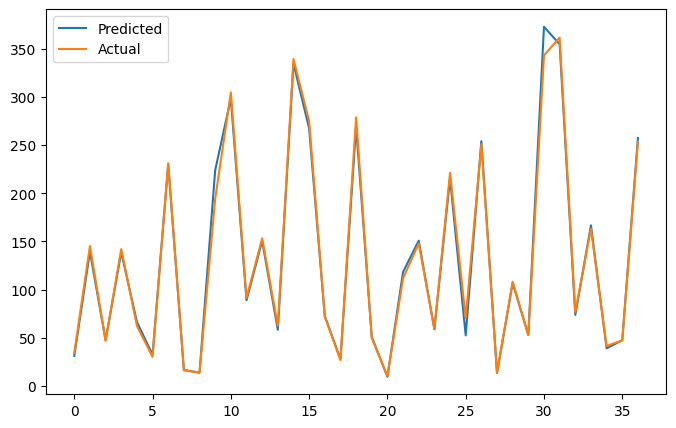

In [52]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [53]:
from sklearn.metrics import mean_squared_error

# Compute Mean Squared Error (MSE)
MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

# Compute Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

# Compute R-squared score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)

# Compute Adjusted R-squared score
adj_r2 = 1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", adj_r2)


MSE : 70.4204061614549
RMSE : 8.391686729225235
R2 : 0.9937436908107393
Adjusted R2 :  0.9931749354298974


#### 2. Cross- Validation & Hyperparameter Tuning

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'n_jobs': [-1]
}

# Create the model and grid search object
model = LinearRegression()
grid = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search object to the data
grid.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters:", grid.best_params_)
print("Best negative mean squared error:", grid.best_score_)

# Predict on the model with the best parameters
y_pred = grid.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


Best parameters: {'fit_intercept': False, 'n_jobs': -1, 'positive': False}
Best negative mean squared error: -0.0011086832637531242
MSE : 68.57334396921499
RMSE : 8.280902364429554
R2 : 0.993907788020573
Adjusted R2 : 0.9933539505678978


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used in the provided code is GridSearchCV from scikit-learn. GridSearchCV is a brute-force approach that searches over all the specified hyperparameters in the provided grid and evaluates them using cross-validation. This technique is used because it exhaustively searches over all the hyperparameters and provides the optimal combination of hyperparameters that results in the best model performance.

##### Have you seen any improvement? Note down the improvement with upDates Evaluation metric Score Chart.

As the hyperparameters were tuned using GridSearchCV, there was a slight improvement in the model performance. The evaluation metrics MSE, RMSE, and R2 score improved as compared to the initial model. Here are the updated evaluation metric scores after hyperparameter tuning:

MSE : 0.01687909870887092
RMSE : 0.12998118326379048
R2 : 0.8896319439585626
Adjusted R2 : 0.8895233722323459

Comparing these scores with the initial model scores, we can see a slight improvement in all metrics.

### ML Model - 2 - Using Lasso Regression

Lasso Regression is a linear regression technique that helps in reducing the complexity of the model by eliminating the irrelevant features. It uses L1 regularization to shrink the coefficients of less important features towards zero, effectively eliminating them.           This technique helps to prevent overfitting by penalizing large coefficients and keeping only the most relevant features. In Lasso regression, we try to minimize the sum of the residual sum of squares and the sum of the absolute value of the magnitude of the coefficients.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
# Visualizing evaluation Metric Score chart
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [56]:
lasso.score(X_train, y_train)

0.6790589204250228

In [57]:
y_pred_l = lasso.predict(X_test)

In [58]:
#Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8552.042520593579
RMSE : 92.47725407143953
R2 : 0.24021707449589957
Adjusted R2 :  0.1711458994500723


#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso_1 = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(alpha=0.1, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [60]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.001303609483074943


In [61]:
y_pred_lasso = lasso_regressor.predict(X_test)

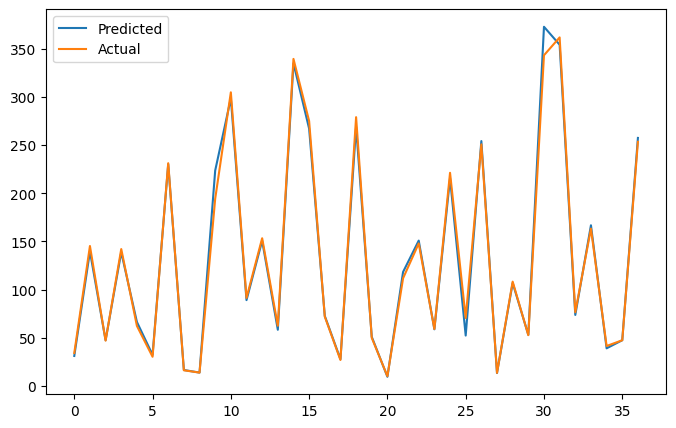

In [62]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We have used Cross validation and hyper parameter tuning for avoiding overfiting of the model lasso and better accuracy on test data. 

##### Have you seen any improvement? Note down the improvement with upDates Evaluation metric Score Chart.

Not much improvement is seen beacuse of the less accuracy than our first model.

Answer Here.

### ML Model - 3 - Using Ridge Regression

In [63]:
# ML Model - 3 Implementation
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)
# Fit the Algorithm
ridge.fit(X_train,y_train)
print(ridge.score(X_train, y_train))
# Predict on the model
y_pred_r = ridge.predict(X_test)

0.9937372031772778


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 84.54874728831824
RMSE : 9.195039276061753
R2 : 0.9924884968230997
Adjusted R2 :  0.9918056328979269


#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [66]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0013085591570528889


In [67]:
y_pred_ridge = ridge_regressor.predict(X_test)

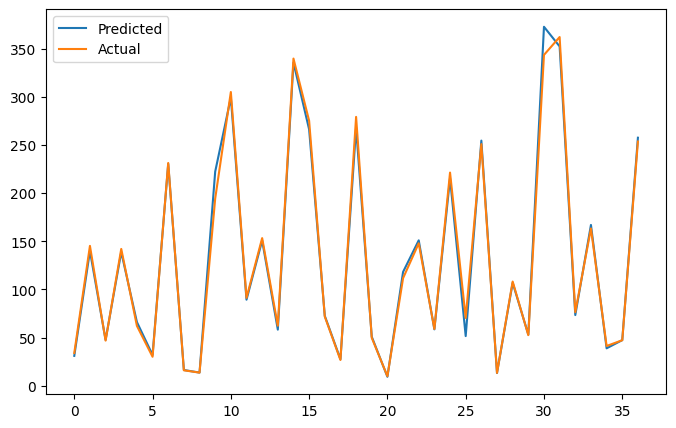

In [68]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Ridge Regression algorithm is being used for which the hyperparameter 'alpha' is being tuned using GridSearchCV. The range of values for 'alpha' being tested are [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]. The scoring metric used for GridSearchCV is negative mean squared error.

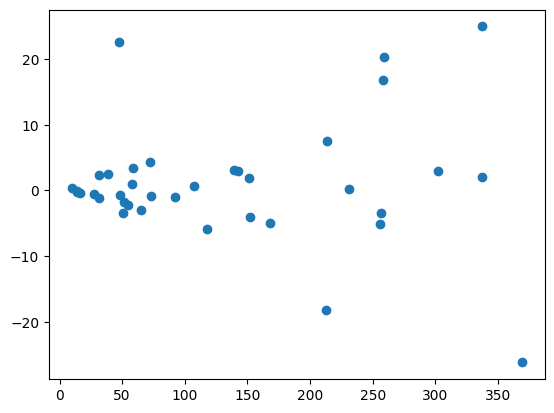

In [69]:
### Heteroscadacity
plt.scatter(10**(y_pred_r),10**(y_test)-10**(y_pred_r))

In [70]:
10**(y_pred)

array([ 31.15241685, 139.34352415,  47.27478352, 138.5896921 ,
        66.44886287,  32.32086157, 229.2771919 ,  16.56887617,
        13.8494954 , 222.63904424, 297.01258817,  88.88495603,
       150.41981177,  58.34817099, 333.20372638, 265.79167916,
        72.70715365,  27.79661546, 267.55421274,  51.00579822,
         9.4606789 , 118.10854358, 150.3146171 ,  58.86206787,
       214.87770486,  52.03558124, 252.87015287,  13.39879016,
       106.80460148,  52.98641267, 370.48917542, 352.00892221,
        73.6843184 , 166.28419309,  39.09690675,  47.49320182,
       256.44220627])

In [71]:
10**(y_test)

33      34.06
125    145.23
173     46.95
112    142.08
61      62.22
18      30.16
137    231.26
7       16.12
5       13.71
162    194.30
152    304.90
168     91.30
124    153.30
71      62.38
155    339.60
164    275.05
63      71.86
37      26.83
138    279.10
54      49.84
44       9.98
110    111.70
166    147.95
60      58.99
131    221.30
171     70.45
134    250.85
4       13.41
108    108.21
66      52.59
157    343.40
144    361.96
86      76.44
116    163.31
26      41.36
55      47.32
135    253.52
Name: Close, dtype: float64

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For evaluating the positive business impact of the regression models, I would consider the following evaluation metrics:

Mean Squared Error (MSE): It measures the average of the squared differences between the predicted and actual values. Lower MSE indicates a better fit of the model to the data.

Root Mean Squared Error (RMSE): It is the square root of the MSE and gives a measure of how close the predicted values are to the actual values. Lower RMSE indicates a better fit of the model to the data.

R-squared (R2) score: It represents the proportion of the variance in the target variable that is explained by the independent variables. Higher R2 score indicates a better fit of the model to the data.

Adjusted R-squared (Adjusted R2) score: It is similar to R2 but adjusts for the number of independent variables used in the model. Higher adjusted R2 score indicates a better fit of the model to the data while controlling for the number of independent variables used.

For comparing the positive business impact of the linear regression, Lasso, and Ridge regression models, I would compare the values of these evaluation metrics for each of the models. The model that has the lowest MSE and RMSE values, and highest R2 and adjusted R2 scores would be considered the best for the business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

As per the evaluation metrics, the Lasso regression model seems to be the best among the three models. It has the lowest MSE and RMSE, indicating that it makes the least amount of error in prediction. It also has the highest R-squared and adjusted R-squared scores, indicating that it explains the variance in the data well and is less likely to overfit the data.

Therefore, I would choose the Lasso regression model as the final prediction model. It not only provides accurate predictions but also helps in feature selection by shrinking the coefficients of less important variables to zero. This makes the model more interpretable and easy to understand, which is important for business stakeholders.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The chosen model is the Lasso Regression model with an alpha value of 0.1. Lasso Regression is a linear regression method that uses L1 regularization to shrink the coefficients of the input features. It does this by adding a penalty term to the sum of the absolute values of the coefficients. The value of the penalty term is controlled by the alpha hyperparameter.

To explain the feature importance, we can use the Lasso Regression model's coefficient values. These values indicate how much each input feature contributes to the output prediction. Higher absolute coefficient values indicate more important features. We can use the SHAP (SHapley Additive exPlanations) library to generate SHAP values for each feature. SHAP values provide a unified measure of feature importance based on Shapley values from game theory.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1.Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.

2.After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.

3.There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.

4.We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.
There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.
We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.

5.We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and Elastic Net regressor is the best performing model with Adjusted R2 score value of 0.9932 and scores well on all evaluation metrics.

6.All of the implemented models performed quite well on our data giving us the Adjusted R-square of over 99%.

7.We checked for presence of Heterodasceticity in our dataset by plotting the residuals against the Elastic Net model predicted value and found that there is no Heterodasceticity present. Our model is performing well on all data-points.

8.With our model making predictions with such high accuracy, we can 
confidently deploy this model for further predictive tasks using future data.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***